In [6]:

# Dependencies
%matplotlib inline
import plotly.plotly as py
from collections import Counter
import pandas as pd
import nltk
import matplotlib.pyplot as plot
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [7]:
# Store filepath in a variable
file_one = "wine_clean.csv"

In [8]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [9]:
# Show just the header
file_one_df.head()

,country,description,points,price,province,variety,winery
0,France,"A big, powerful wine that sums up the richness...",99,2300,Bordeaux,Bordeaux-style Red Blend,ChÃÂ¢teau Latour
1,US,The nose on this single-vineyard wine from a s...,91,2013,California,Chardonnay,Blair
2,France,"A massive wine for Margaux, packed with tannin...",98,1900,Bordeaux,Bordeaux-style Red Blend,ChÃÂ¢teau Margaux
3,France,A wine that has created its own universe. It h...,100,1400,Champagne,Chardonnay,Krug
4,France,"The purest Cabernet Sauvignon fruit, with dark...",96,1300,Bordeaux,Bordeaux-style Red Blend,ChÃÂ¢teau Mouton Rothschild


In [10]:
#file_one_df(" ".join(df["text"]).split()).most_common(100)

pd.Series(' '.join(file_one_df["description"]).lower().split()).value_counts()[:50]

and         242777
the         151917
a           126401
of          110179
with         90046
this         67113
is           63634
in           44690
to           38074
it           36936
wine         34145
flavors      29584
on           28582
but          28145
that         25668
it's         24551
fruit        21044
aromas       18097
for          17938
from         17579
are          16183
has          16045
by           15365
black        14643
drink        13537
an           13067
finish.      12861
as           12720
cherry       12484
its          12386
palate       12224
ripe         11931
flavors.     11793
tannins      10921
red          10839
acidity      10292
notes         9212
sweet         9037
shows         9030
very          8773
good          8530
rich          8440
finish        8072
not           8057
some          8052
wine,         8034
spice         7870
dry           7739
at            7736
berry         7723
dtype: int64

In [11]:
top_N = 16

df = pd.read_csv('wine_clean.csv',
                 usecols=['description'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

# replace '|'-->' ' and drop all stopwords
words = (df.description
           .str.lower()
           .replace([r"[\|.']" , RE_stopwords], [" ", ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
result = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')



In [45]:
result_final = result.drop('wine',axis=0)
result_final
result_final.to_csv(r'C:\Users\Magnus\Desktop\wine\word_count.csv')

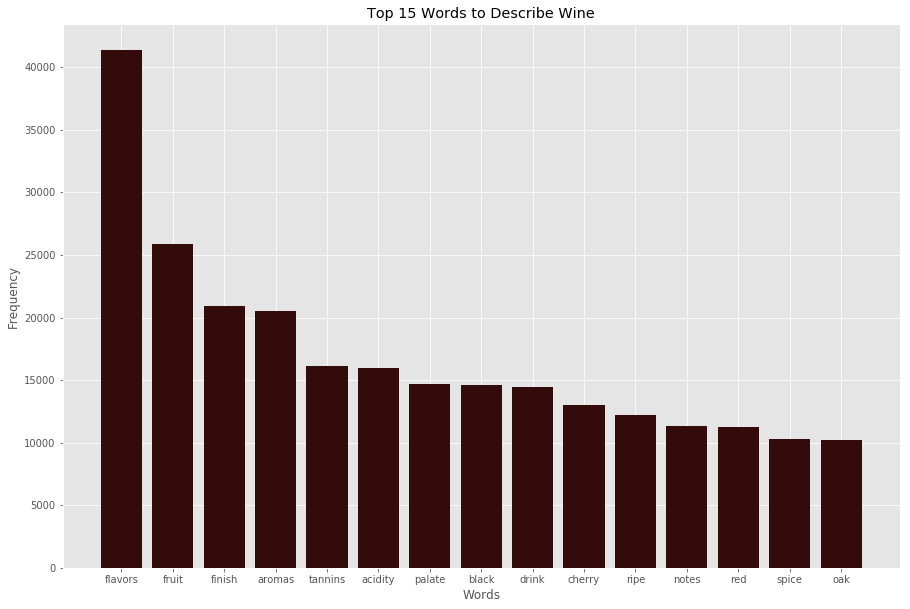

In [20]:
# plot
#result.plot.bar(rot=0, figsize=(16,10), width=0.8)
#plot.savefig('wine_bar.png')
#plot.show()

plt.style.use('ggplot')
plt.figure(figsize=(15,10))
x = ['flavors', 'fruit', 'finish','aromas', 'tannins', 'acidity', 'palate', 'black', 'drink', 'cherry', 'ripe', 'notes', 'red', 'spice', 'oak']
g = [41380, 25881, 20936, 20486, 16128, 15994, 14700, 14649, 14423, 13022, 12194, 11302, 11257, 10263, 10194]
x_pos = np.arange(len(x))
plt.bar(x_pos, g, color='#330b0b')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 15 Words to Describe Wine")
plt.xticks(x_pos, x)
plot.savefig('wine_words.png')
plt.show()





In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

reviews = pd.read_csv("wine_clean.csv", index_col=0)


In [36]:
all_desc = reviews.description.str.split(' ')
rw = [ word for desc in all_desc for word in desc]
rw4 = [ w for w in rw if len(w) > 4]
rwSerie = pd.Series(rw4)
rwCounts = rwSerie.value_counts()
top19 = rwCounts[:19]
print(top19)

flavors     28249
fruit       20892
aromas      16692
black       14149
finish.     12861
cherry      12333
palate      12218
flavors.    11793
tannins     10654
acidity     10076
Drink        9598
notes        8924
sweet        8461
finish       8055
wine,        8026
spice        7762
berry        7645
shows        7360
blend        7206
dtype: int64


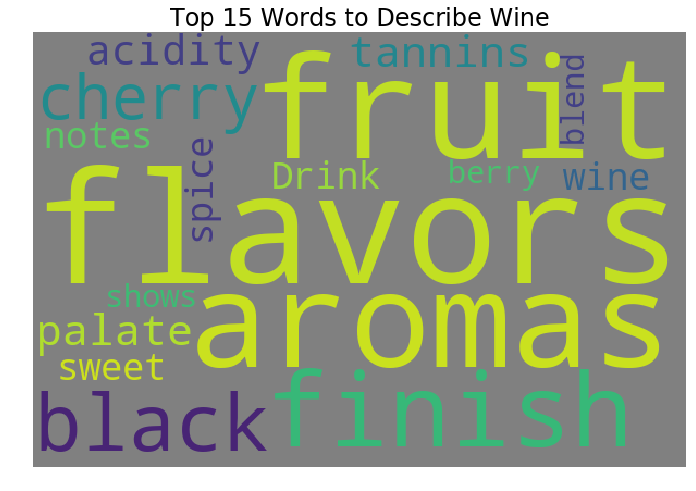

In [42]:
words = ''
for w in top19.index:
    for i in range(top20.loc[w] // 5000):
        words = words + w + ' '

plt.figure(figsize=(12,8))
wc = WordCloud(background_color='gray', max_font_size=200,
                            width=600,
                            height=400,
                            max_words=20,
                            relative_scaling=.2).generate(words)
plt.savefig('wine_wc.png')
plt.imshow(wc)
plt.title("Top 15 Words to Describe Wine", fontsize=24)
plt.axis("off");
plt.savefig('wine_wc.png')